In [1]:
import numpy as np
from tensorflow import keras
print (keras.__version__)


2.8.0


In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [3]:
X_train, y_train = X_train[(y_train==0) | (y_train==1)], y_train[(y_train==0) | (y_train==1)]

In [4]:
X_test, y_test = X_test[(y_test==0) | (y_test==1)], y_test[(y_test==0) | (y_test==1)]


In [5]:
X_train.shape

(12665, 28, 28)

In [6]:
from collections import Counter
Counter(y_train)

Counter({0: 5923, 1: 6742})

In [7]:
X_train_final = X_train.reshape(-1,784)
X_train_final.shape

(12665, 784)

In [8]:
X_test_final = X_test.reshape(-1,784)
X_test_final.shape

(2115, 784)

In [9]:
X_train_final = X_train_final / 255
X_test_final = X_test_final / 255

In [10]:
model = keras.Sequential()

# First Hidden Layer
model.add(keras.layers.Dense(512, input_shape= (784,), activation = 'relu'))
# Second Hidden Layer
model.add(keras.layers.Dense(256, activation = 'relu'))
# Output Layer
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [11]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [12]:
results = model.fit(
    x = X_train_final,
    y = y_train,
    shuffle = True,
    epochs = 30,
    batch_size = 16,
    validation_data = (X_test_final, y_test)
)

Epoch 1/30
792/792 [==============================] - 7s 6ms/step - loss: 0.0588 - binary_accuracy: 0.9900 - val_loss: 0.0077 - val_binary_accuracy: 0.9991
Epoch 2/30
792/792 [==============================] - 4s 5ms/step - loss: 0.0090 - binary_accuracy: 0.9981 - val_loss: 0.0040 - val_binary_accuracy: 1.0000
Epoch 3/30
792/792 [==============================] - 3s 3ms/step - loss: 0.0061 - binary_accuracy: 0.9983 - val_loss: 0.0029 - val_binary_accuracy: 1.0000
Epoch 4/30
792/792 [==============================] - 2s 3ms/step - loss: 0.0051 - binary_accuracy: 0.9984 - val_loss: 0.0024 - val_binary_accuracy: 1.0000
Epoch 5/30
792/792 [==============================] - 2s 3ms/step - loss: 0.0042 - binary_accuracy: 0.9989 - val_loss: 0.0021 - val_binary_accuracy: 1.0000
Epoch 6/30
792/792 [==============================] - 3s 3ms/step - loss: 0.0038 - binary_accuracy: 0.9989 - val_loss: 0.0019 - val_binary_accuracy: 1.0000
Epoch 7/30
792/792 [==============================] - 2s 3ms/ste

In [13]:
eval = model.evaluate(x = X_test_final, y = y_test)

67/67 [==============================] - 0s 2ms/step - loss: 0.0011 - binary_accuracy: 1.0000


In [14]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Losses')

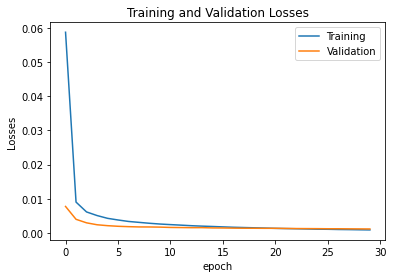

In [15]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoch')
plt.ylabel('Losses')


Text(0, 0.5, 'accuarcy')

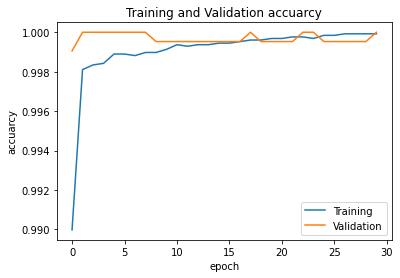

In [16]:
plt.plot(results.history['binary_accuracy'])
plt.plot(results.history['val_binary_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuarcy')
plt.xlabel('epoch')
plt.ylabel('accuarcy')


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________
